# 神经网络核心概念讲解

### 引言
各位同学好，今天我们一起来探讨神经网络这个主题。神经网络是人工智能领域最重要的基础之一，它通过模仿人类大脑的工作方式，实现了许多令人惊叹的应用。

### 一、神经元模型
让我们从最基本的构建块 - 神经元开始：

1. **什么是神经元？**
   - 就像人类大脑中的神经元一样，它接收信息，处理信息，然后做出响应
   - 数学表达：\( y = f(\sum w_ix_i + b) \)
  ![M-P神经元模型](https://lf26-appstore-sign.oceancloudapi.com/ocean-cloud-tos/BYTE_RAG_UPLOAD_BIZ_TYPE/None_1743418407908_J4FS6s5sfI.jpeg?lk3s=61a3dea3&x-expires=1746868828&x-signature=zFDsHTkfsceC7uRVXcZlUDimJCs%3D)

1. **激活函数的作用**
   - 常见的激活函数：阶跃函数、Sigmoid、ReLU
   ![典型的神经元激活函数](https://lf3-appstore-sign.oceancloudapi.com/ocean-cloud-tos/BYTE_RAG_UPLOAD_BIZ_TYPE/None_1743418407908_0H6YJR0V0R.jpeg?lk3s=61a3dea3&x-expires=1746868828&x-signature=QVP3UtW1dj9lpk4ZIS5JrX3VNAg%3D)
   - 比如ReLU函数：\( f(x) = max(0,x) \)，它帮助我们解决了梯度消失的问题
   - 在我们的代码示例中，就使用了ReLU激活函数：
   

In [ ]:
self.activation = nn.ReLU()


### 二、从感知机到多层网络
1. **单层感知机**
   - 最简单的神经网络
   - 只能解决线性分类问题
   - 局限性：无法解决异或问题
   ![感知机与多层网络](https://lf9-appstore-sign.oceancloudapi.com/ocean-cloud-tos/BYTE_RAG_UPLOAD_BIZ_TYPE/None_1743418407908_0Z0t0ZFr63.jpeg?lk3s=61a3dea3&x-expires=1746868828&x-signature=yEmWQOZGQJcr4Z%2BCinT2xUoR6BA%3D)
1. **多层网络**
   - 引入隐藏层
   - 能够解决非线性问题
   - 看我们的代码示例：

In [ ]:
self.fc1 = nn.Linear(1, 10)  # 输入层→隐藏层
self.fc2 = nn.Linear(10, 1)  # 隐藏层→输出层

### 三、BP算法
1. **工作原理**
   - 前向传播：计算预测结果
   - 反向传播：计算误差并更新权重
   - 代码中的训练过程：

In [ ]:
optimizer.zero_grad()
outputs = model(X)
loss = criterion(outputs, y)
loss.backward()
optimizer.step()


2. **训练过程的可视化**
   - 左图显示损失函数的变化
   - 右图展示预测结果的改进
   - 这直观地展示了网络的学习过程

### 四、优化问题
1. **全局最小与局部极小**
   - 全局最小：最优解
   - 局部极小：次优解
   - 解决方法：随机初始化、使用Adam优化器等

### 五、现代神经网络
1. **CNN（卷积神经网络）**
   - 特点：局部连接、权值共享
   - 应用：图像识别、计算机视觉

2. **RNN（循环神经网络）**
   - 特点：具有记忆能力
   - 应用：自然语言处理、语音识别

### 六、深度学习的特点
1. **优势**
   - 自动特征学习
   - 强大的表达能力
   - 端到端学习

2. **挑战**
   - 需要大量数据
   - 计算资源要求高
   - 模型解释性差

### 总结
神经网络是一个不断发展的领域，从最初的感知机到现代的深度学习架构，它让机器具备了越来越强大的学习能力。通过我们今天展示的代码示例，大家也能直观地看到神经网络是如何学习和改进的。

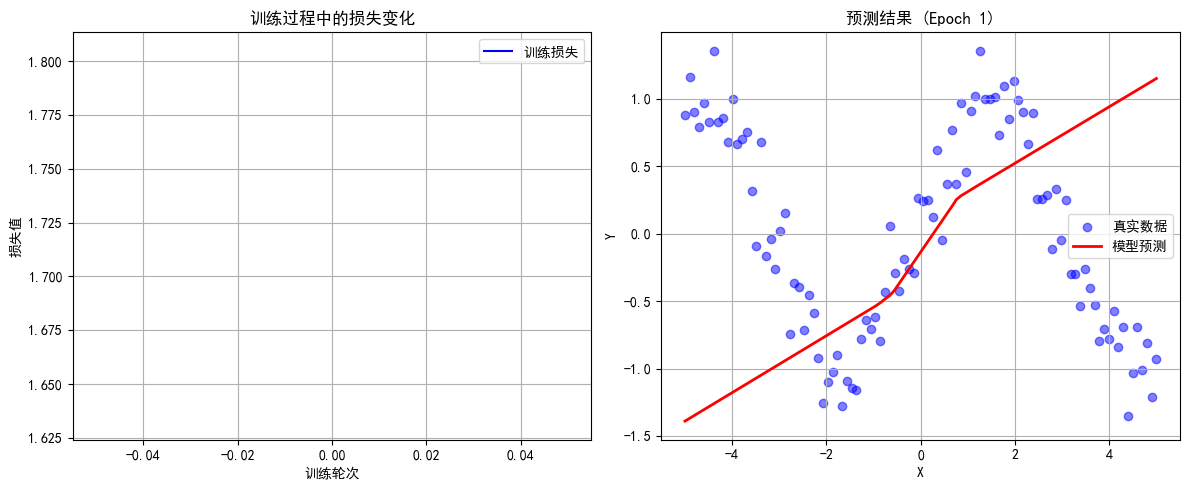

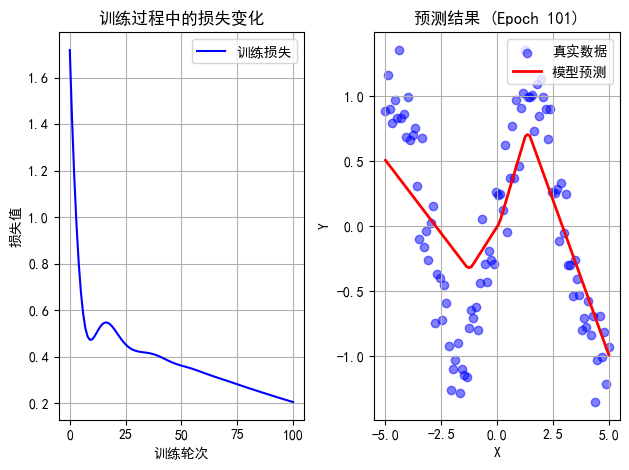

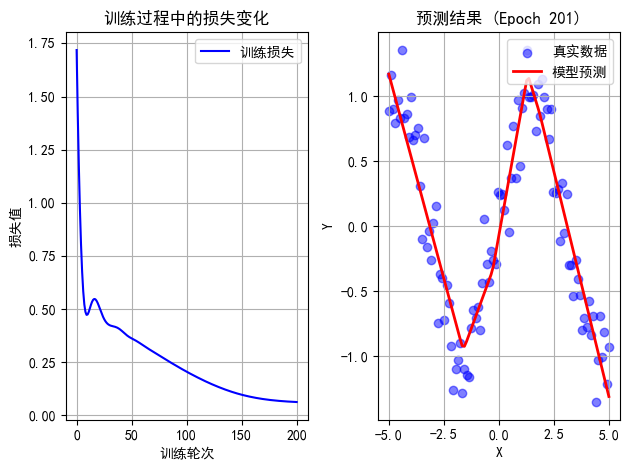

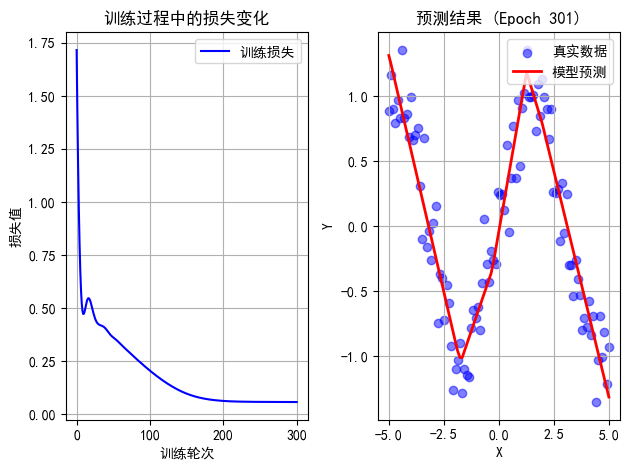

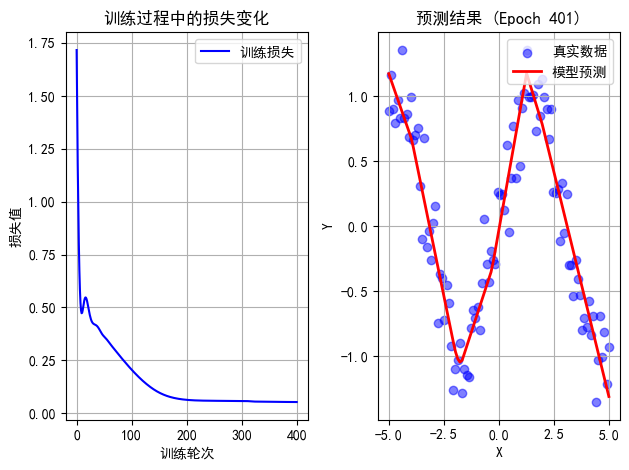

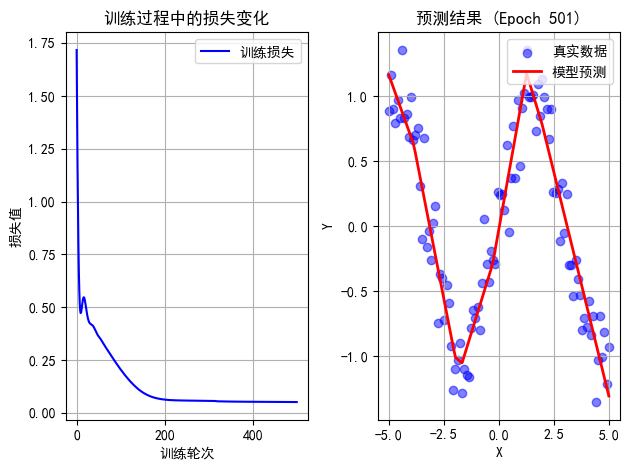

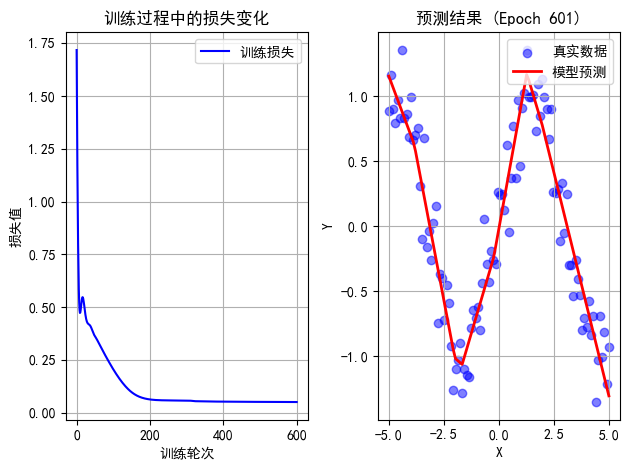

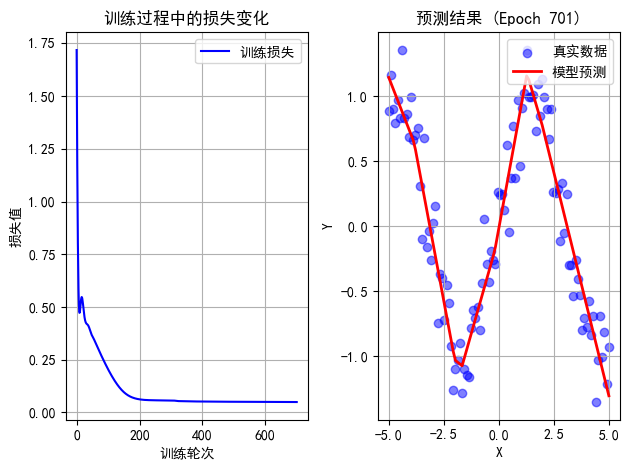

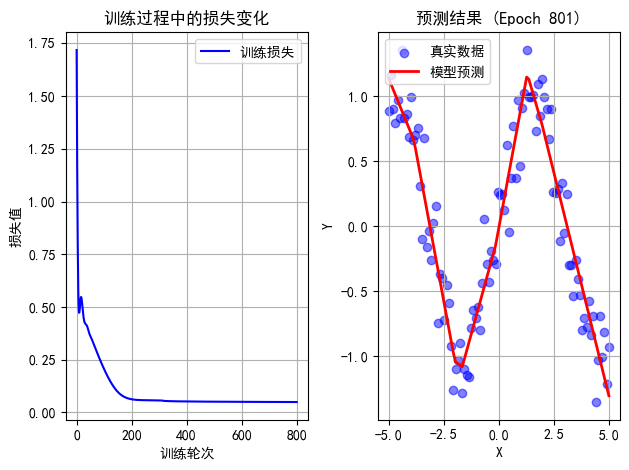

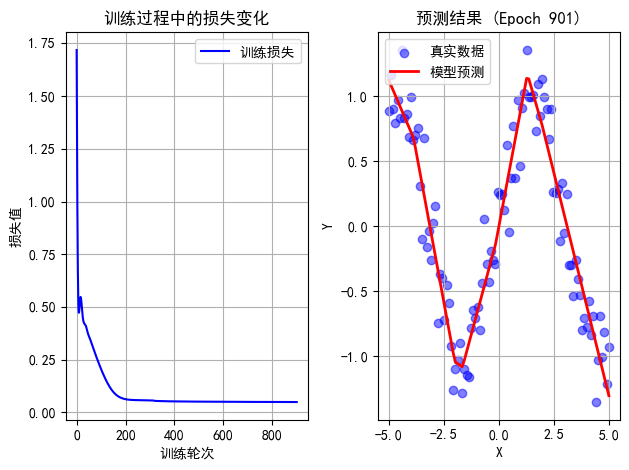

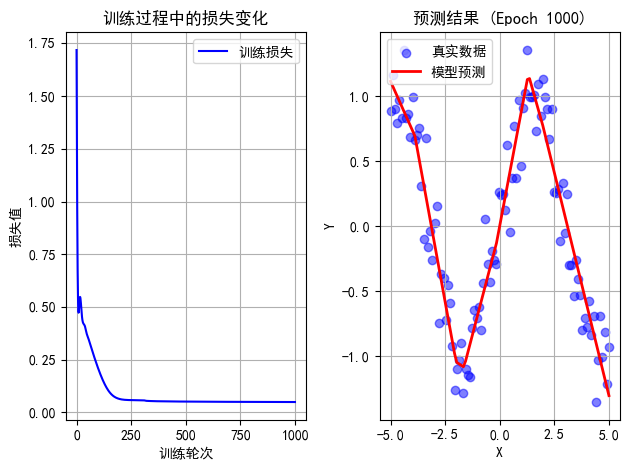

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

# 生成数据
X = torch.linspace(-5, 5, 100).reshape(-1, 1)
y = torch.sin(X) + 0.2 * torch.randn(X.size())

# 定义网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # 输入层→隐藏层
        self.fc2 = nn.Linear(10, 1)  # 隐藏层→输出层
        self.activation = nn.ReLU()   # 激活函数

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# 训练
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []
epochs = 1000

# 创建一个图形，包含两个子图
plt.figure(figsize=(12, 5))

# 训练循环
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    # 每100个epoch绘制一次预测结果
    if epoch % 100 == 0 or epoch == epochs-1:
        plt.clf()  # 清除当前图形
        
        # 绘制损失函数
        plt.subplot(1, 2, 1)
        plt.plot(losses, 'b-', label='训练损失')
        plt.title('训练过程中的损失变化')
        plt.xlabel('训练轮次')
        plt.ylabel('损失值')
        plt.legend()
        plt.grid(True)
        
        # 绘制预测结果
        plt.subplot(1, 2, 2)
        with torch.no_grad():
            predicted = model(X)
        plt.scatter(X.numpy(), y.numpy(), c='b', label='真实数据', alpha=0.5)
        plt.plot(X.numpy(), predicted.numpy(), 'r-', label='模型预测', linewidth=2)
        plt.title(f'预测结果 (Epoch {epoch+1})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.pause(0.5)  # 暂停一小段时间以显示动画效果

plt.show()  # 显示最终结果